import lib ---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

import data --

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
boston = fetch_openml(name="boston",version=1,as_frame=True)
boston.data.shape

(506, 13)

In [4]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [5]:
df['target'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  target   506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
PTRATIO,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000
B,506.0,356.674032,91.294864,0.32000,375.377500,391.44000,396.225000,396.9000


In [8]:
# Data preprocessing

df['CHAS'] = df['CHAS'].apply(lambda x:int(x))
df['RAD'] = df['RAD'].apply(lambda x:int(x))

In [9]:
x = df.drop('target',axis=1)
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [10]:
# LR

model = LinearRegression()
model.fit(x_train,y_train)
y_pre = model.predict(x_test)

mse = mean_squared_error(y_pre,y_test)
mae = mean_absolute_error(y_pre,y_test)

print(f'Mean Square Error: {mse}\nMean Absolute Error: {mae}')


Mean Square Error: 24.29111947497367
Mean Absolute Error: 3.1890919658878656


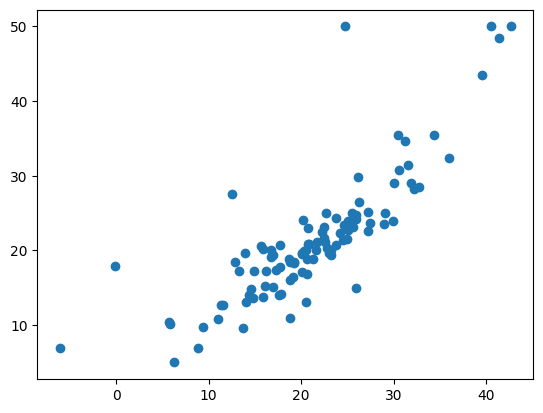

In [11]:
# Plot the prediction vs actual in scatter plot

plt.scatter(y_pre,y_test)
plt.show()

In [16]:
# Feature selection information gain

from sklearn.feature_selection import mutual_info_regression

imp = mutual_info_regression(x,y)

imp_score = pd.Series(imp,index=x.columns)
imp_score = imp_score.sort_values(ascending=False)
print(imp_score)

LSTAT      0.666991
RM         0.527700
NOX        0.470887
INDUS      0.463777
PTRATIO    0.446627
TAX        0.364805
CRIM       0.335089
AGE        0.311127
DIS        0.294460
RAD        0.208193
ZN         0.188598
B          0.162615
CHAS       0.021754
dtype: float64
